# In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification
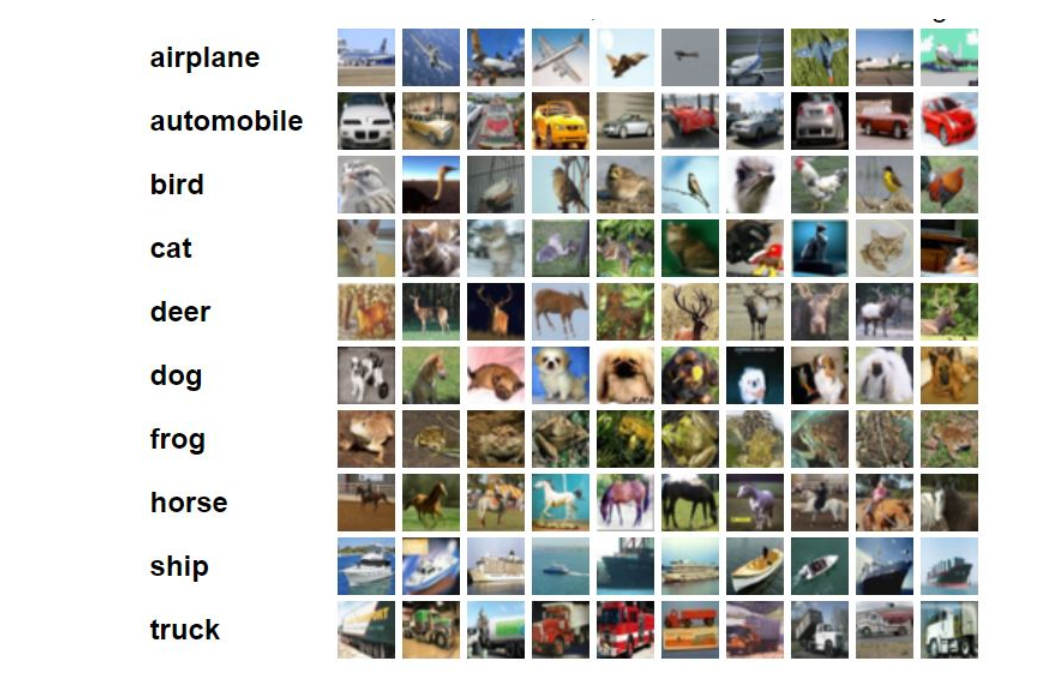

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Next, we load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 923s 5us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

# Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

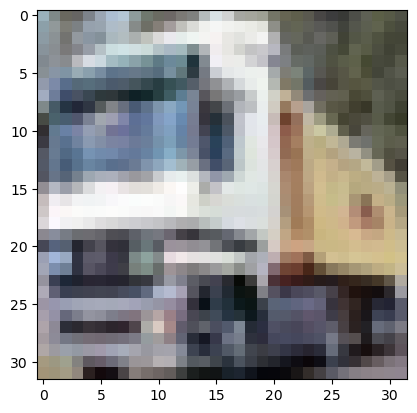

In [16]:
plt.imshow(X_train[1])

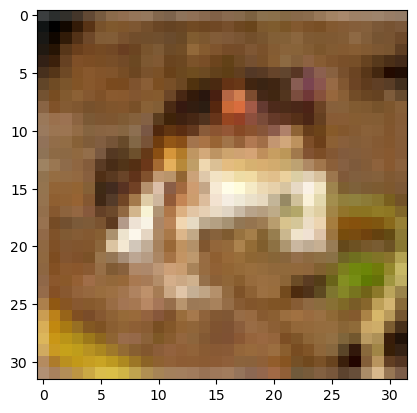

In [17]:
plt.imshow(X_train[0])

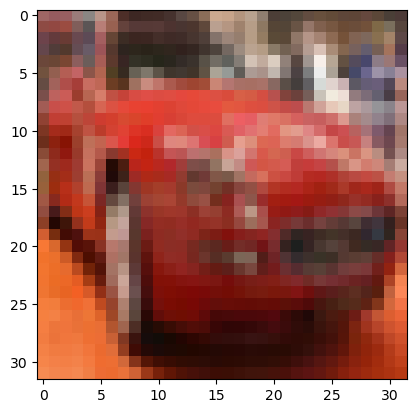

In [18]:
plt.imshow(X_train[5])

In [19]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

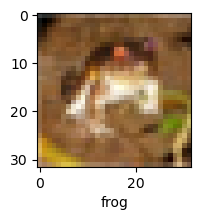

In [20]:
plot_sample(X_train, y_train, 0)

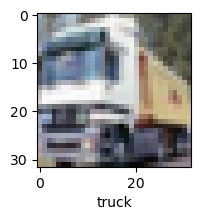

In [21]:
plot_sample(X_train, y_train, 1)

- Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3027 - loss: 1.9364
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4154 - loss: 1.6466
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4543 - loss: 1.5551
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4804 - loss: 1.4866
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4963 - loss: 1.4377


# You can see that at the end of 5 epochs, accuracy is at around 49%

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.34      0.46      1000
           1       0.67      0.52      0.58      1000
           2       0.43      0.26      0.32      1000
           3       0.30      0.49      0.37      1000
           4       0.48      0.33      0.39      1000
           5       0.38      0.32      0.35      1000
           6       0.42      0.72      0.53      1000
           7       0.71      0.34      0.46      1000
           8       0.44      0.78      0.56      1000
           9       0.54      0.55      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



# Now let us build a convolutional neural network to train our images

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.3595 - loss: 1.7516
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5847 - loss: 1.1930
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6377 - loss: 1.0358
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6632 - loss: 0.9685
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6852 - loss: 0.9036
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7080 - loss: 0.8473
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7202 - loss: 0.8086
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7426 - loss: 0.7463
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7471 - loss: 0.7290
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7568 - loss: 0.6921


# With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [29]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6881 - loss: 0.9116


[0.9287791848182678, 0.6848999857902527]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[2.0946668e-02, 6.7675619e-06, 3.7497696e-02, 8.4864056e-01,
        5.5253222e-03, 1.3816192e-02, 1.0368980e-02, 3.4679897e-04,
        6.2135104e-02, 7.1585434e-04],
       [7.4328454e-03, 8.1585698e-02, 1.1792290e-04, 2.6617723e-05,
        3.2841206e-05, 1.8225003e-06, 8.0718358e-08, 1.6333914e-05,
        9.0498233e-01, 5.8035189e-03],
       [1.5399079e-01, 5.0985932e-01, 5.8030025e-03, 4.3370822e-03,
        1.5113028e-04, 2.3618907e-04, 3.5384664e-04, 4.6343501e-03,
        3.0221722e-01, 1.8417075e-02],
       [9.2305768e-01, 1.1641037e-02, 3.8294740e-02, 2.1080973e-03,
        3.2434505e-03, 8.2708750e-05, 1.6267838e-04, 1.0653192e-03,
        1.9477399e-02, 8.6680747e-04],
       [2.1733127e-04, 5.9162010e-04, 2.6423978e-02, 4.2735156e-02,
        4.6444654e-02, 1.2294972e-02, 8.6917222e-01, 5.0695148e-06,
        1.9659998e-03, 1.4902669e-04]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

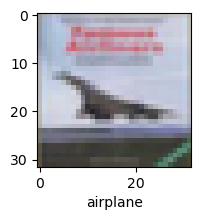

In [33]:
plot_sample(X_test, y_test,3)

In [34]:
classes[y_classes[3]]

'airplane'

In [35]:
classes[y_classes[3]]

'airplane'